## **Lab 2 - Clustering Exercise**

In this exercise, we will apply our knowledge of clustering on the following dataset:

Dataset Link:
https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

Clustering on this dataset will be done using KMeans, Hierarchal clustering and DBSCAN. Finding the optimal hypermaters for each and then choosing the best model among the three

Start by Importing needed libraries

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset into a DataFrame

In [96]:
df = pd.read_csv('CC_GENERAL.csv')

In [97]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [98]:
df = df.fillna(0)
df.drop(['CUST_ID'], axis=1, inplace=True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [99]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [100]:
df = pd.get_dummies(df)

In [101]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

## K-Means

Find the optimal Kmeans model

In [102]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
# Make sure to watch video to understand this line and fit() vs transform()
cluster_labels = model.fit_predict(scaled_df)
# IMPORTANT NOTE: YOUR 0s and 1s may be opposite of ours,
# makes sense, the number values are not significant!
cluster_labels

array([1, 1, 0, ..., 1, 1, 1], dtype=int32)

In [103]:
len(scaled_df)


8950

In [104]:
len(cluster_labels)

8950

<Axes: >

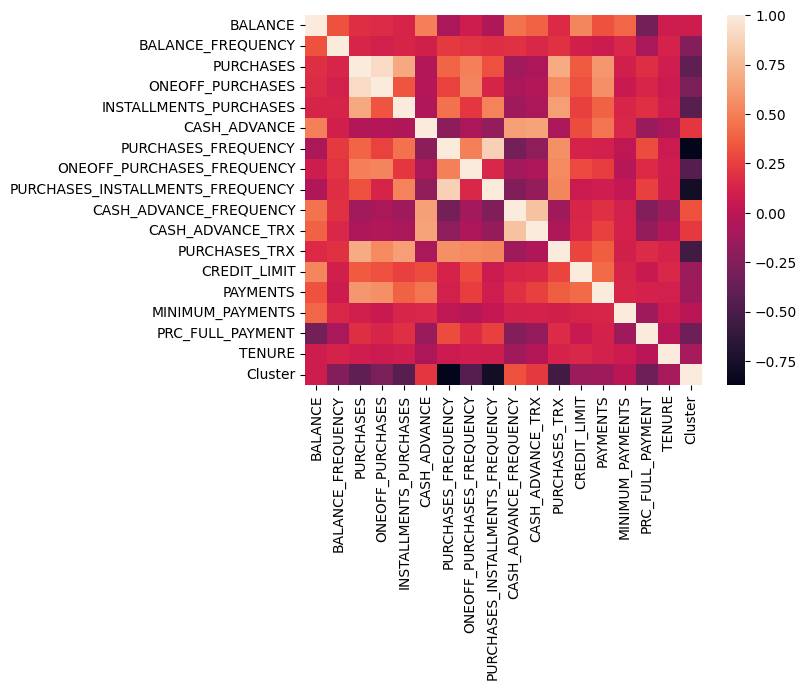

In [105]:
df['Cluster'] = cluster_labels
sns.heatmap(df.corr())

In [106]:
df.corr()['Cluster']

BALANCE                             0.074427
BALANCE_FREQUENCY                  -0.242263
PURCHASES                          -0.404032
ONEOFF_PURCHASES                   -0.279448
INSTALLMENTS_PURCHASES             -0.441696
CASH_ADVANCE                        0.215423
PURCHASES_FREQUENCY                -0.870284
ONEOFF_PURCHASES_FREQUENCY         -0.449344
PURCHASES_INSTALLMENTS_FREQUENCY   -0.777951
CASH_ADVANCE_FREQUENCY              0.321781
CASH_ADVANCE_TRX                    0.226141
PURCHASES_TRX                      -0.542338
CREDIT_LIMIT                       -0.141366
PAYMENTS                           -0.133020
MINIMUM_PAYMENTS                   -0.009648
PRC_FULL_PAYMENT                   -0.337807
TENURE                             -0.100865
Cluster                             1.000000
Name: Cluster, dtype: float64

Choose the optimal K and calculate the silhouette score for the best model.

In [107]:
ssd = []

for k in range(2,5):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(scaled_df)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

Text(0, 0.5, ' Sum of Squared Distances')

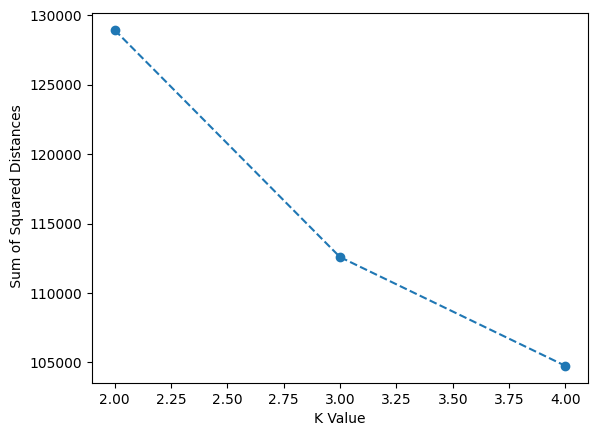

In [108]:
plt.plot(range(2,5),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

In [109]:
ssd

[128950.89865626016, 112589.10496434041, 104751.25644882147]

In [110]:
# Change in SSD from previous K value!
pd.Series(ssd).diff()

0             NaN
1   -16361.793692
2    -7837.848516
dtype: float64

<Axes: >

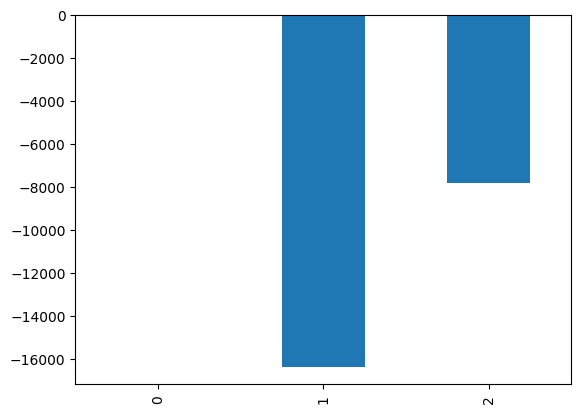

In [111]:
pd.Series(ssd).diff().plot(kind='bar')

## Agglomerative Clustering

Find the optimal agglomerative clustering model.

In [112]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

In [113]:
s = []
linkage_list = ["average", "single"]
metric_list = ["euclidean", "manhattan", "cosine"]
n = np.arange(2, 20)
best = -1
best_metric = " "
best_n = 1
best_linkage = " "

for n_clusters in n:
    for metric in metric_list:
        for linkage in linkage_list:
            model = AgglomerativeClustering(n_clusters=n_clusters, metric=metric, linkage=linkage)
            model = model.fit(df)
            silhouette = silhouette_score(df, model.labels_)  # ,metric='euclidean')
            s.append(silhouette)
            # print("Silhouette Score for number of clusters = "+ str(n_clusters)+ " "+str(metric)+" and "+str(linkage)+" is "+str(silhouette)+".")
            if silhouette >= best:
                best_n = n_clusters
                best = silhouette
                best_metric = metric
                best_linkage = linkage

Choose the optimal K and calculate the silhouette score for the best model.

In [114]:
print("Best agglomerative clustering model for this data is number of clusters=" + " " + str(best_n) + " " +
      "with linkage of " + str(best_linkage) + " and metric of " + str(best_metric) + "." +
      " Silhouette Score is " + str(best) + ".")

Best agglomerative clustering model for this data is number of clusters= 2 with linkage of average and metric of manhattan. Silhouette Score is 0.9057107141979551.


In [115]:
best_model = AgglomerativeClustering(n_clusters=best_n, metric=best_metric, linkage=best_linkage)
best_cluster_labels = best_model.fit_predict(df)

## DBSCAN

Find the optimal DBSCAN model.

In [ ]:
from sklearn.cluster import DBSCAN


Find the parameters that optimize the performance of your model and calculate the silhouette score.

In [ ]:
outlier_percent = []

for eps in np.linspace(0.001,3,50):
    
    # Create Model
    dbscan = DBSCAN(eps=eps)
    cluster_labels = dbscan.fit_predict(scaled_df)
   
     
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(cluster_labels)
    
    outlier_percent.append(perc_outliers)

Text(0.5, 0, 'Epsilon Value')

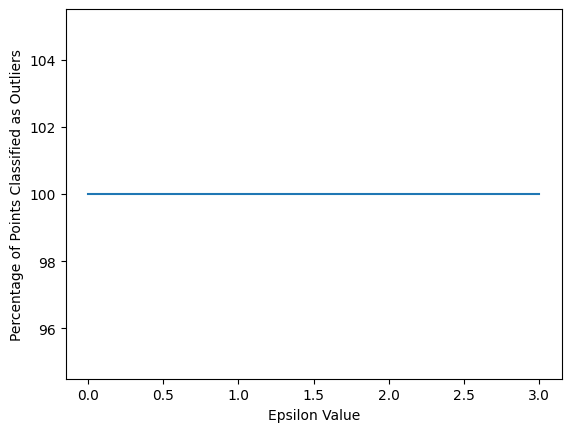

In [ ]:
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

## Result Interpretation and Discussion

Which model was chosen? Why was it chosen and based on what?